Link to Github: [marisalong.github.io](https://marisalong.github.io/)

<a id='top'></a>
<h1 style="text-align: center;">Analysis of Alzheimer's Disease Features </h1>
<h4 style="text-align: center;">Marisa Long and Anna Schoeny 

***

#### Notebook Contents
[Introduction](#introduction)\
[Discussion of Data Sources](#discuss)\
[Extract, Transform, Load (ETL)](#etl)\
[Exploratory Data Analysis (EDA)](#eda)\
[Modeling and Analysis](#model)\
[Insights and Final Thoughts](#final)\
[References](#cite)


<a id='introduction'></a>
## Introduction

Our team was interested in working with datasets related to Alzheimer's disease, particularly taken from studies measuring features of dementia patients such as years of education, brain volumetrics, age of diagnosis and death, and more. We are particularly interested in working with datasets relating to Alzheimer's and dementia because both of our families have both been personally impacted by the disease. 

Alzheimer's disease impacts families across the globe and is the leading cause of dementia in aging populations. Alzheimer's is a neurological disease that is most widely recognized as progressive memory loss. However, Alzheimer's can have a host of other impacts on patients, including paranoia, delusions, self injurious behaviors and depression, and difficulty speaking, swallowing, and walking. Given the detrimental outcomes of Alzheimer's disease, families are often left with the burden of personally caring for patients or finding palliative care options. Families might suffer the physical and emotional burdens of caregiving, as well as the guilt and pain associated with watching a loved one progressively lose themselves. To put it simply, hundreds of thousands of people are diagnosed with Alzheimer's each year, and research on the disease is still riddled with unanswered question and lack of clarity in terms of predictive features and treatment options. There is a push in the field to start [implementing Machine Learning models](https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294/full) and other computer/data science methods as a means of predicting Alzheimer's diagnoses. We wanted to engage in our own data analysis with this in mind. 

For the purpose of this project, we will be seeking to evaluate the relationships that exist between these patient features and the onset of symptoms and diagnosis of Alzheimer's disease. We were most interested in looking at features such as education and gender at the offset of our research, but we also wanted to keep our mind open to other predictive features based on our exploratory analysis. We are interested in getting a sense of both where research dead-ends in terms of predictive modeling as well as potentially discovering more promising areas where research might be headed. Though we do recognize that our lack of expertise in the field may be a barrier to our analyses, we hope to use of data science skills to explore some potential areas to research further rather than claiming to try to understand the intricacies of the neuroscientific data. 

***

<a id='discuss'></a>
## **Discussion of Data Sources**
The first dataset that we determined was fit for our project is [MRI and Alzheimer's](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers), taken from the Open Access Series of Imaging Studies (OASIS). OASIS is a project that has sought to make brain imaging datasets more widely available to the public. This dataset includes MRI comparisons of adults with Alzheimer's and healthy adults. This dataset was initially interesting to our team because the this dataset has a high data usability score as assigned by Kaggle, which represents user ratings on the documentation of the data. This high score indicates that the data is in a state ready for our analysis. This dataset also includes both cross-sectional and longitudinal MRI data. The cross-sectional data highlights 416 subjects ranging from age 18 to 96 and details 3 to 4 MRI scans for each subject. Approximately $1\over4$ of the subjects had been diagnosed with Alzheimer's disease. <mark> The longitudinal data follows a sample of 150 subjects aged 60 to 96. *__are we sure this is right? why does it say the patients 190 nondemented, 146 demented and 37 converted below?__*</mark> These same 150 subjects were scanned two or more times with at least a year between imaging sessions. 64 of the subjects were diagnosed with Alzheimer's disease by the time of the first scan with an additional 14 diagnosed at one of the later scan visits. Using this data, we are hoping to be able to answer questions regarding the ability to predict dementia in patients based on features such as socioeconomic status or education. For example:

- Is education a predictive feature for individuals who had dementia at the time of their first scan or who were diagnosed with dementia over the course of the study?
- Is socioeconomic status a predictor for Alzheimer's?


For our second dataset, we wanted to dive further into brain difference between females and males that could contribute to differences in the prevalence of dementia. We also continued to explore correlations between years of education and dementia onset. For this milestone, we performed exploratory analysis on the [Seattle Alzheimer's Disease Brain Cell Atlas Donor Metadata dataset](https://portal.brain-map.org/explore/seattle-alzheimers-disease/seattle-alzheimers-disease-brain-cell-atlas-download?edit&language=en). This dataset was taken from studies conducted by the Allen Institute for Brain Science, the University of Washington, and the Kaiser Permanente Washington Health Research Institute. The data highlights demographic, clinical, cognitive, and neuropathological data for a set of 84 patients. The patient features include cognitive status, level and years of education, sex, race, brain pH, measures from numerous brain scans, and ages at different stages in each patients cognitive journey. We found this dataset particularly interesting since there is also a separate volumetric dataset that can be linked using the donor ID. For the purpose of our exploratory analysis, we did not use the volumetric dataset as neither of us have the neuroscience expertise to understand the complexity of these measures, but we did plan to incorporate it into our analysis if we saw fit in the future. Using the metadata we initially explored, we hope to answer questions such as the following:
- Are there size, density, or chemical differences between sexes that may contribute to the onset of Alzheimer’s or other dementias?
- Are the number of years of education or the education level a predictive feature for the onset of dementia? If so, is a predictive feature of when the onset will occur?

This second question is especially interesting to us because we want to see if our findings are consistent with our analysis from the first dataset regarding education as a potential predictive feature. 

### Dataset Vocabulary and Abbreviations

 TODO: add so that we understand better and our readers can easily understand

### Data Limitations 

<mark> Note some issues with our data (different sets of patients between our datasets, lack of knowledge in the field regarding many of the measured scores, etc.) - we mention challenges at the bottom that I think we should move up here once we clarify what limitations we can't address ourselves. </mark>

***

<a id='etl'></a>
## Extract, Transform, and Load Data (ETL) 

First, we needed to import the necessary libraries and ensure we are working in the correct directory to access our data.

In [1]:
# double checking that we are in the correct directory
!pwd
import warnings
warnings.filterwarnings('ignore') 
# getting some weird warnings that we've looked into and are choosing to ignore 

/Users/annaschoeny/Desktop/TU/Senior/Sem1/DataScience/marisalong.github.io


In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Now we need to read in each of our datasets and conduct any necessary transformations and reformatting. 

### Dataset 1: MRI and Alzheimer's
Data from OASIS project

#### Longitudinal Data:

In [3]:
# Read in the longitudinal data and take a peek
df_alhz_long = pd.read_csv('./data/oasis_longitudinal.csv')
df_alhz_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


<mark> Do we want to change any of these column names to make them easier to compare with our other datasets? Like male/female instead of M/F, Cognitive Status instead of Group, idk other examples but just something to consider? Also, is it worth explaining what each of these measures are - we mention MMSE in the other dataset so could be good to make a separate table with like a key of what each of these measures are? Both for us and anyone without knowledge reading this notebook... 

Since this data represents the same individual in multiple rows, we decided to break out the different visits out into seperate tables. We are created another table that holds the keys to each individual so that we can still access each visit associated with a specific individual.

In [4]:
# Dataframe 1: Visit 1
df_long1 = df_alhz_long[df_alhz_long['Visit'] == 1]
df_long1.rename(columns={'Visit': "Visit1"}, inplace=True)

# Dataframe 2: Visit 2
df_long2 = df_alhz_long[df_alhz_long['Visit'] == 2]
df_long2.rename(columns={'Visit': "Visit2"}, inplace=True)

# Dataframe 3: Visit 3
df_long3 = df_alhz_long[df_alhz_long['Visit'] == 3]
df_long3.rename(columns={'Visit': "Visit3"}, inplace=True)

# Dataframe 4: holds the individuals keys and which visits they have had
cols = ['Subject ID', 'Visit1', 'Visit2', 'Visit3']
df_long_ids = df_long1.merge(df_long2, on = "Subject ID", how = "outer")
df_long_ids = df_long_ids.merge(df_long3, on = "Subject ID", how = "outer")
df_long_ids = df_long_ids[cols]
df_long_ids.set_index('Subject ID', inplace=True)

In [5]:
# Drop the Visits from Dataframes 1-3

df_long1.drop(columns=['Visit1'], inplace=True)
df_long2.drop(columns=['Visit2'], inplace=True)
df_long3.drop(columns=['Visit3'], inplace=True)

# Change the visit columns to booleans in the ID dataframe
df_long_ids['Visit1'].replace(1, True, inplace=True)
df_long_ids['Visit2'].replace(2.0, True, inplace=True)
df_long_ids['Visit3'].replace(3.0, True, inplace=True)

# Change np.nan to False in the ID dataframe
df_long_ids.fillna(False, inplace=True)

In [6]:
# Tables created above displayed

display(df_long_ids)
display(df_long1)
display(df_long2)
display(df_long3)

,Visit1,Visit2,Visit3
Subject ID,,,
OAS2_0001,True,True,False
OAS2_0002,True,True,True
OAS2_0004,True,True,False
OAS2_0005,True,True,True
OAS2_0007,True,False,True
...,...,...,...
OAS2_0182,True,True,False
OAS2_0183,True,True,True
OAS2_0184,True,True,False


,Subject ID,MRI ID,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


,Subject ID,MRI ID,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
3,OAS2_0002,OAS2_0002_MR2,Demented,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
6,OAS2_0004,OAS2_0004_MR2,Nondemented,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
8,OAS2_0005,OAS2_0005_MR2,Nondemented,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
14,OAS2_0008,OAS2_0008_MR2,Nondemented,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,OAS2_0182,OAS2_0182_MR2,Demented,776,M,R,75,12,NaN,20.0,0.5,1654,0.696,1.061
362,OAS2_0183,OAS2_0183_MR2,Nondemented,182,F,R,66,13,2.0,30.0,0.0,1506,0.740,1.165
366,OAS2_0184,OAS2_0184_MR2,Demented,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
368,OAS2_0185,OAS2_0185_MR2,Demented,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037


,Subject ID,MRI ID,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
4,OAS2_0002,OAS2_0002_MR3,Demented,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
9,OAS2_0005,OAS2_0005_MR3,Nondemented,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
11,OAS2_0007,OAS2_0007_MR3,Demented,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
21,OAS2_0012,OAS2_0012_MR3,Nondemented,1598,F,R,83,16,2.0,29.0,0.0,1323,0.718,1.327
24,OAS2_0013,OAS2_0013_MR3,Nondemented,1456,F,R,85,12,4.0,29.0,0.0,1225,0.710,1.433
30,OAS2_0017,OAS2_0017_MR3,Nondemented,617,M,R,81,12,3.0,27.0,0.5,1814,0.759,0.968
34,OAS2_0018,OAS2_0018_MR3,Converted,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
38,OAS2_0020,OAS2_0020_MR3,Converted,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
49,OAS2_0027,OAS2_0027_MR3,Nondemented,1234,F,R,73,12,3.0,30.0,0.0,1358,0.775,1.293
59,OAS2_0031,OAS2_0031_MR3,Converted,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199


We want to check out the datatypes in each of our dataframes to ensure they are formatted in the way that makes the most sense. Here are the datatypes for this dataframe:

In [7]:
df_alhz_long.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

We also want to get a sense of what patients are being recorded in this data.

In [8]:
# Looking at what type of patients make up this dataset
df_alhz_long['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

<mark> Talk a little more about how this is broken down between demented/nondemented individuals so we make sure to consider this in any analysis we do (if this is important to note? Idek anymore)</mark>

"Converted" refers to individuals that were not initially diagnosed with Alzheimer's at the time of the first scan but were diagnosed with Alzheimer's at one of their later scans. 

#### Cross-Sectional Data:

The MRI and Alzheimer's study also includes cross-sectional data from the same research lab, which is included below:

In [9]:
# Read in the cross-sectional data and take a peek
df_alhz_cross = pd.read_csv('./data/oasis_cross-sectional.csv')
df_alhz_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


Here are the datatypes of the dataframe:

In [10]:
df_alhz_cross.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

Note: This the cross-sectional data does not have a group column that classifies the patients as demented, nondemented or converted like the longitudinal dataset does. However, they still include the Clinical Dementia Rating (CDR) that describes the level of dementia. According to the CDR, these are the classifications:
0 = no dementia, 
0.5 = very mild Alzheimer's Disease, 
1 = mild Alzheimer's Disease, 
2 = moderate Alzheimer's Disease.

To make the data more easily comparable to the longitudinal data, we used this quantitative variable to create a categorical variable with the three states. 

<mark> This is one thing Culotta mentioned in his comments on Milestone 1. Maybe further describe this to address his concerns about it. See highlighted section below to read what he wrote. </mark>

In [11]:
#Create a Group variable for cross-sectional data
df_alhz_cross['Group'] = df_alhz_cross['CDR'].map({
    0.0: 'Nondemented',
    0.5: 'Demented',
    1.0: 'Demented',
    1.5:'Demented',
    2.0:'Demented'
})

# Look at how many individuals fall into each category
df_alhz_cross['Group'].value_counts()

Nondemented    135
Demented       100
Name: Group, dtype: int64

### Dataset 2: Metadata

In [12]:
# Read in the data 
df_meta_complete = pd.read_csv('./data/sea-ad_cohort_donor_metadata_082222.csv')

In [13]:
# Get a sense of all the columns available in the data
df_meta_complete.columns

Index(['Donor ID', 'Primary Study Name', 'Secondary Study Name',
       'Age at Death', 'Sex', 'Race (choice=White)',
       'Race (choice=Black/ African American)', 'Race (choice=Asian)',
       'Race (choice=American Indian/ Alaska Native)',
       'Race (choice=Native Hawaiian or Pacific Islander)',
       'Race (choice=Unknown or unreported)', 'Race (choice=Other)',
       'specify other race', 'Hispanic/Latino', 'Highest level of education',
       'Years of education', 'APOE4 Status', 'Cognitive Status',
       'Age of onset cognitive symptoms', 'Age of Dementia diagnosis',
       'Known head injury', 'Have they had neuroimaging',
       'Consensus Clinical Dx (choice=Alzheimers disease)',
       'Consensus Clinical Dx (choice=Alzheimers Possible/ Probable)',
       'Consensus Clinical Dx (choice=Ataxia)',
       'Consensus Clinical Dx (choice=Corticobasal Degeneration)',
       'Consensus Clinical Dx (choice=Control)',
       'Consensus Clinical Dx (choice=Dementia with Lewy Bod

In [14]:
# Making a dataframe with only the columns we want to examine at this point
df_meta = df_meta_complete[['Donor ID', 'Age at Death', 'Sex', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)','Hispanic/Latino', 'Highest level of education', 'Years of education', 'Cognitive Status', 'Age of onset cognitive symptoms', 'Age of Dementia diagnosis', 'Known head injury', 'Fresh Brain Weight', 'Brain pH', 'Last MMSE Score']]

Before completing our analysis, we wanted to clean up this dataframe to make it more easily readable. 

In [15]:
# Want to clean up the Race columns into one simple column
df = pd.DataFrame()
df["Race (choice=White)"] = df_meta["Race (choice=White)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Black/ African American)"] = df_meta["Race (choice=Black/ African American)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Asian)"] = df_meta["Race (choice=Asian)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=American Indian/ Alaska Native)"] = df_meta["Race (choice=American Indian/ Alaska Native)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Native Hawaiian or Pacific Islander)"] = df_meta["Race (choice=Native Hawaiian or Pacific Islander)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Unknown or unreported)"] = df_meta["Race (choice=Unknown or unreported)"].map({
    'Checked': 1, 
    'Unchecked': 0
})
df["Race (choice=Other)"] = df_meta["Race (choice=Other)"].map({
    'Checked': 1, 
    'Unchecked': 0
})

new_df = df.idxmax(axis=1)
df_meta["Race"] = new_df.values

df_meta.drop(['Race (choice=White)', 'Race (choice=Black/ African American)', "Race (choice=Asian)", "Race (choice=American Indian/ Alaska Native)", "Race (choice=Native Hawaiian or Pacific Islander)", "Race (choice=Unknown or unreported)", "Race (choice=Other)"], axis=1, inplace=True)

df_meta["Race"] = df_meta["Race"].map({
    'Race (choice=White)': "White", 
    'Race (choice=Black/ African American)': "Black/African American", 
    'Race (choice=Asian)':'Asian',
    'Race (choice=American Indian/ Alaska Native)':"American Indian/Alaska Native",
    'Race (choice=Native Hawaiian or Pacific Islander)': 'Native Hawaiian/Pacific Islander',  
    'Race (choice=Unknown or unreported)': "Unknown/Unreported",      
    'Race (choice=Other)': "Mixed" # Determined this to be mixed given the the column "specify other race"
})

# Taking peak at reformatted data
df_meta.head(5)

# Checking the datatypes
df_meta.dtypes

Donor ID                            object
Age at Death                        object
Sex                                 object
Hispanic/Latino                     object
Highest level of education          object
Years of education                   int64
Cognitive Status                    object
Age of onset cognitive symptoms     object
Age of Dementia diagnosis           object
Known head injury                   object
Fresh Brain Weight                  object
Brain pH                           float64
Last MMSE Score                    float64
Race                                object
dtype: object

***

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<mark> **Notes from Professor Culotta to Address**: </mark>

* Histogram of years of study to see if it's skewed - e.g. there may be 20% that span more than 5 years. 
    - Marisa: did this below, but now we need to add analysis
* Is education status a component of how they calculate SES?
* "This allows us to hypothesize that women on average are older than men when they are affected by Alzheimer's" account for women living longer overall somehow here
* "To make the data more easily comparable to the longitudinal data, we used this quantitative variable to create a categorical variables with the three states" This could be tricky - is there an official definition of dementia we could use here? Worried that .5 would not be classified as dementia
    - Marisa: answer to this: yes, it is mild dementia. I can go back through the article and quote it
* "The mean age of patients when they got their MRI scan was 51.3 years old, which is much younger than the previous dataset." Any idea why? This is a considerable difference that we should attempt to address 

### Questions for Previous Dataset (Longitudinal): 

#### What is the average level of education (variable 'EDUC') of demented vs non-demented vs converted individuals?

In [16]:
# Average Education level for demented individuals
df_alhz_long[df_alhz_long.Group == "Demented"].EDUC.mean()

13.67123287671233

In [17]:
# Average Education level for nondemented individuals
df_alhz_long[df_alhz_long.Group == "Nondemented"].EDUC.mean()

15.142105263157895

In [18]:
# Average Education level for converted individuals
df_alhz_long[df_alhz_long.Group == "Converted"].EDUC.mean()

15.45945945945946

One hypothesis we have based on this brief summary of education level is that education slows cognitive decline. This is suppored by the data above, where demented individuals have and average of 13.7 years, nondemented individuals have an average of 15.1 years, and converted individuals have 15.5 years. Looking at education differences among clinically demented vs nondemented individuals will help us determine how strongly education level may predict Alhzeimer's.

#### How are education and socioeconomic status related in this sample?

In [19]:
df_alhz_long["EDUC"].corr(df_alhz_long["SES"])

-0.7226472777909835

At first glance, a strong negative correlation between education level and socioeconomic status was suprising. However, when we read the publication that came out alongside this dataset, they authors explained that 'SES' is ranked using the Hollingshead Index of Social Position and has 1 being the highest status, where 5 is the lowest. Therefore, this statistic shows that individuals from a higher socioeconomic status were likely to recieve more education than those of lower socioeconomic statuses. Through our further exploration, we hope to uncover the relationship between socioeconomic status, education, and dementia.

#### Over how many years did the study track each individual?

To check for skewness in the age data from the longitudinal study, we decided to look at the difference from first to last visit for each of the individuals.

In [20]:
# Creating a new dataframe to hold these age-differences

#get start and end dates for each proceeding
gb = df_alhz_long.groupby("Subject ID",sort=False)["Age"]
ages = gb.apply(min).to_frame().merge(gb.apply(max), on="Subject ID").rename(
    columns={"Age_x": "Age of First Visit", "Age_y": "Age of Last Visit"})
ages['Difference'] = (ages["Age of Last Visit"] - ages["Age of First Visit"])
ages

,Age of First Visit,Age of Last Visit,Difference
Subject ID,,,
OAS2_0001,87,88,1
OAS2_0002,75,80,5
OAS2_0004,88,90,2
OAS2_0005,80,85,5
OAS2_0007,71,75,4
...,...,...,...
OAS2_0182,73,75,2
OAS2_0183,66,72,6
OAS2_0184,72,73,1


<AxesSubplot:ylabel='Frequency'>

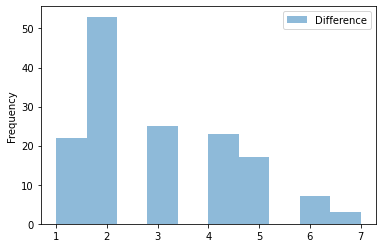

In [21]:
# Putting these differences into a histogram

ages_sorted = ages.sort_values('Difference')
ages_sorted.Difference.plot.hist(alpha=.5, legend=True, xlabel='Years from First to Last Visit')


<mark> **Add Analysis of this graph here**: </mark>

From this histogram, we can see that the longitudinal study did not cover the same number of years for each patient. The study ranged from one visit (which would have a span of 1 year here), to up to three visit spanning up to seven years. Because we are looking to build a model that is predicts risk of Alzheimer's, not age of onset, we plan to just use the data from the first visit (since the first visit had the greatest number of participants).

#### How old were people in this dataset when they had their first MRI scan for dementia?

In [22]:
# Filtering data to get just the first visit
first_visit = df_alhz_long[df_alhz_long.Visit == 1]

#Take mean of age of filtered data
first_visit.Age.mean()

75.44666666666667

In [23]:
# Take standard deviation of age of filtered data
first_visit.Age.std()

7.545421000584566

The mean age of patients on their first visit was 74.4 years old, and this dataset had a standard deviation of 7.5. This shows that this dataset focuses heavily on Alhzeimer's and dementia in older individuals, rather than also considering early onset Alzheimer's. Looking at age allows us to understand the timeframe for dementia onset. 

#### How does the number of females vs males with dementia compare in this dataset?

M/F
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

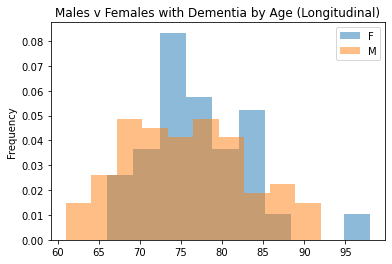

In [24]:
# Creating new dataframe with ages in accending order
age_accending_dementia = df_alhz_long.sort_values('Age')
age_accending_dementia = age_accending_dementia[age_accending_dementia.Group == "Demented"]
age_accending_dementia.groupby("M/F").Age.plot.hist(alpha=.5, density=True, legend=True, xlabel='Age of Indv. with Dementia', title='Males v Females with Dementia by Age (Longitudinal)')

Compared to the male data, the female data appears to be more right-skewed. This allows us to hypothesize that women on average are older than men when they are affected by Alhzeimer's. This is relevant to our main goal as one of the variables we are focusing on is gendered differences in Alzheimer's.

### Questions for Previous Dataset (Cross Sectional):

#### What is the average level of education (variable 'EDUC') of demented vs non-demented vs converted individuals?

In [25]:
# Average Education level for demented individuals
df_alhz_cross[df_alhz_cross.Group == "Demented"].Educ.mean()

2.82

In [26]:
# Average Education level for nondemented individuals
df_alhz_cross[df_alhz_cross.Group == "Nondemented"].Educ.mean()

3.4444444444444446

This is consisted with the dataframe above, showing that on average nondemented individuals had a higher education level than the demented individuals. This does appear to be on a different scale, which we address in our commentary below. 

#### How are education and socioeconomic status related in this sample?

In [27]:
df_alhz_cross["Educ"].corr(df_alhz_cross["SES"])

-0.7423610355426756

Similar to the longitudinal data, this statistic shows that individuals from a higher socioeconomic status were likely to recieve more education than those of lower socioeconomic statuses. The correlation is also very similar, with it being -0.74 in the cross-sectional data compared to -0.72 in the longitudinal data. 

#### How old were people in this dataset when they had their MRI to scan for dementia?

In [28]:
#Take mean of age
df_alhz_cross.Age.mean()

51.357798165137616

In [29]:
# Take standard deviation of age
df_alhz_cross.Age.std()

25.269862268101562

The mean age of patients when they got their MRI scan was 51.3 years old, which is much younger than the previous dataset. This dataset also had a much bigger spread in regards to age, with the standard deviation of 25.3. This tells us that the cross-sectional dataset could contain cases of early onset Alzheimer's. This will allow us to look at a wider range of Alhzeimer's onset data.

#### How does the number of females vs males with dementia compare in this dataset?

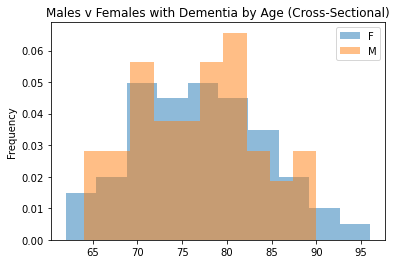

In [30]:
# Creating new dataframe with ages in accending order
age_accending_cross = df_alhz_cross.sort_values('Age')
age_accending = age_accending_cross[age_accending_cross.Group == "Demented"]
age_accending.groupby("M/F").Age.plot.hist(alpha=.5, density=True, legend=True)
plt.title('Males v Females with Dementia by Age (Cross-Sectional)')
plt.show()

From this graphic, we see that females have a wider range of ages. This differs from the longtidudinal data and indicates that we have to dig deeper before drawing conclusions on our gender hypothesis.

## Dataset 2 EDA

For our milestone 2 dataset, we were interested in introducing more data related to patients with and without dementia to gain a further picture of what features may be related to cognitive decline. This dataset includes a variety of features ranging from the age of the onset of symptoms, the age of death, education levels, sex, brain weight and pH, and several cognitive test scores. Several of these same features were present in our MRI dataset, so we hope this will allow us to be able to examine these two datasets together.

### Dataset 2: Metadata

In [31]:
 df_meta.Sex.value_counts()

Female    51
Male      33
Name: Sex, dtype: int64

We see that this dataframe is slightly skewed in terms of sex. There are more females than males.

In [32]:
df_meta.Race.value_counts()

White    81
Asian     3
Name: Race, dtype: int64

More drastic of a skew than with sex, this dataset is almost entirely white patients, which may pose some constraints on our ability to generalize. We will keep this in mind when making any statements regarding race using this dataset, and note that this is one piece of potential missing data.

#### Distribution of Dementia by Age and Sex

In [33]:
# Distribution of patients with and without dementia
df_meta["Cognitive Status"].value_counts()

No dementia    42
Dementia       42
Name: Cognitive Status, dtype: int64

In [34]:
# ...and now grouped by sex
print("Female:")
print(df_meta[df_meta["Sex"] == "Female"]["Cognitive Status"].value_counts())
print("\nMale:")
print(df_meta[df_meta["Sex"] == "Male"]["Cognitive Status"].value_counts())

Female:
Dementia       27
No dementia    24
Name: Cognitive Status, dtype: int64

Male:
No dementia    18
Dementia       15
Name: Cognitive Status, dtype: int64


We see that although there are more females than males in the dataset, there is a difference of 3 between the number of donors with dementia and without dementia for both sexes. For males, there are more donors without dementia while for females there are more donors with dementia. This is information we will have to keep in mind for the rest of our EDA while comparing between sexes.

#### Brain pH for Dementia v. No dementia

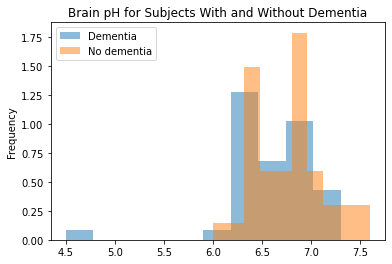

In [35]:
df_meta.groupby("Cognitive Status")['Brain pH'].plot.hist(alpha=.5, density=True, legend=True)
plt.title('Brain pH for Subjects With and Without Dementia')
plt.xlabel=('pH')
plt.show()

Based on this exploratory graph, there are several observations that can be made about brain pH as it relates to dementia diagnosis. For individuals with dementia, the mode appears at individuals with pH around 6.2-6.3, whereas individuals without dementia appear to have a peak for individuals with a brain pH around 6.9. Ignoring the distinct outlier in the dementia patients, the spread of patients with and without dementia is around 1.5. However, the maximum pH for individuals without dementia is higher at around 7.6, whereas the max pH for individuals with dementia falls at around 7.2. We wanted to consider brain pH as it relates to dementia because brain pH may be a potential indicating factor for dementia, and we know that females tend to have a lower brain pH. 

To dive further, we wanted to look at the differences between individuals with and without dementia and their pH levels by sex. 

Sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Brain pH, dtype: object

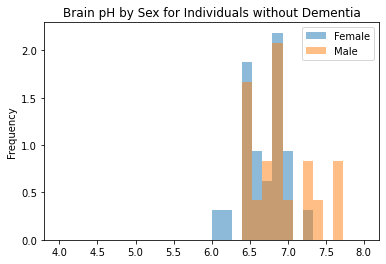

In [36]:
df_meta_nodementia = df_meta[df_meta["Cognitive Status"] != "Dementia"]
df_meta_dementia = df_meta[df_meta["Cognitive Status"] == "Dementia"]

df_meta_nodementia.groupby("Sex")['Brain pH'].plot.hist(alpha=.5, density=True, legend=True, xlabel = "Brain pH", title = "Brain pH by Sex for Individuals without Dementia", bins=30, range=[4.0, 8.0])

Sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Brain pH, dtype: object

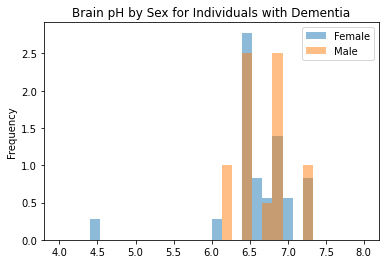

In [37]:
# now fow dementia
df_meta_dementia.groupby("Sex")['Brain pH'].plot.hist(alpha=.5, density=True, legend=True, xlabel = "Brain pH", title = "Brain pH by Sex for Individuals with Dementia", bins=30, range=[4.0, 8.0])


From these two plots, it appears that brain pH is lower in the individuals with dementia. For instance, although males tend to lean towards a higher pH in both the demented and non-demented group, in the non-demented group the highest male brain pH is around 7.6 where it is around 7.3 in the demented group. Females tended to have a slightly lower brain pH in both groups, with the non-demented group having a low of about 6.0 and the demented group having a lot of around 4.4. We found this particularly interesting that females appear to have a slightly lower baseline pH compared to men and that brain pH appears to fall with dementia. At this point, we have to keep digging further to see if brain pH is a good predictor for dementia. If so, we will do more research on pH between females and males to see if baseline brain pH could contribute to the likelihood of developing dementia.

#### Examining the Relationship between Education and Dementia

One of our focuses in the previous dataset was on education and dementia, so we wanted to continue that analysis here. 

In [38]:
print("Highest Education Level")
print(df_meta["Highest level of education"].value_counts())
print("\nYears of Education")
print(df_meta["Years of education"].value_counts())

Highest Education Level
Graduate (PhD/Masters)       25
Bachelors                    22
High School                  18
Trade School/ Tech School    15
Professional                  4
Name: Highest level of education, dtype: int64

Years of Education
16    17
18    13
12    12
21    10
15     8
14     8
17     7
13     4
20     3
19     2
Name: Years of education, dtype: int64


All of the individuals in this dataset have had a fair amount of education (at least through high school), so we are unable to assess how extremely low levels of education may correlate with dementia. However, there is a large range in the type of education received as well as the number of years of education with a range of 9.

Average length of education for individuals with/without dementia:

In [39]:
# Average Education level for demented individuals
print("The average number of years of education for individuals with dementia is", round(df_meta[df_meta["Cognitive Status"] == "Dementia"]["Years of education"].mean(), 2))

# Average Education level for non-demented individuals
print("The average number of years of education for individuals without dementia is", round(df_meta[df_meta["Cognitive Status"] == "No dementia"]["Years of education"].mean(), 2))

The average number of years of education for individuals with dementia is 16.62
The average number of years of education for individuals without dementia is 15.79


This differs from our previous dataset, where education was longer with individuals without dementia. 

In [40]:
# Average Education level for females
print("The average years of education for females is", round(df_meta[df_meta["Sex"] == "Female"]["Years of education"].mean(), 2))

# Average Education level for males
print("The average years of education for males is", round(df_meta[df_meta["Sex"] == "Male"]["Years of education"].mean(), 2))

The average years of education for females is 15.98
The average years of education for males is 16.55


In [41]:
# Average Education level for females
print("The average years of education for females with dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Female") & (df_meta["Cognitive Status"] == "Dementia")]["Years of education"].mean(),2))
print("The average years of education for females without dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Female") & (df_meta["Cognitive Status"] == "No dementia")]["Years of education"].mean(),2))

# Average Education level for males
print("The average years of education for males with dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Male") & (df_meta["Cognitive Status"] == "Dementia")]["Years of education"].mean(),2))
print("The average years of education for males without dementia is", end=' ')
print(round(df_meta[(df_meta["Sex"] == "Male") & (df_meta["Cognitive Status"] == "No dementia")]["Years of education"].mean(),2))

The average years of education for females with dementia is 16.44
The average years of education for females without dementia is 15.46
The average years of education for males with dementia is 16.93
The average years of education for males without dementia is 16.22


The years of education does not vary much between females and males, which will be helpful in our analysis. Therefore, when we look at education we don’t have to worry as much about the distribution of sexes.

In [42]:
# Correlation between education and dementia

# create a numeric version of dementia column for this analysis

df_meta["cog_status_num"] = df_meta["Cognitive Status"].map({
    "Dementia": 1,
    "No dementia": 0
})


df_alhz_cross['cog_status_num'] = df_alhz_cross['Group'].map({
    'Nondemented': 0,
    'Demented': 1
})

df_alhz_long['cog_status_num'] = df_alhz_long['Group'].map({
    'Nondemented': 0,
    'Converted': 1,
    'Demented': 1
})

# correlation
print("Correlation between years of education and dementia from the meta data:")
print(df_meta["Years of education"].corr(df_meta["cog_status_num"]))
print("Correlation between years of education and dementia from oasis study...")
print("based on the cross-sectional data:", df_alhz_cross["Educ"].corr(df_alhz_cross["cog_status_num"]))
print("based on the longitudinal data:", df_alhz_long["EDUC"].corr(df_alhz_long["cog_status_num"]))

Correlation between years of education and dementia from the meta data:
0.15100381378815506
Correlation between years of education and dementia from oasis study...
based on the cross-sectional data: -0.23591049426349353
based on the longitudinal data: -0.19306010020826195


Once again, we see that this data may contradict our dataset from above. There appears to be a positive correlation in our new dataset between more education and the development of dementia, where it was the opposite in both datasets above. However, these correlations are still all relatively low, so we would need more data to truly determine the significance of education.

In [43]:
df_meta_dummy = pd.concat([df_meta, pd.get_dummies(df_meta["Sex"])], axis=1)
# TO DO : make a correlation matrix between certain variables and dementia
variables = ["cog_status_num", 
             "Last MMSE Score", 
             "Female",
             "Male",
             "Years of education"]
df_meta_dummy[variables].corr()

,cog_status_num,Last MMSE Score,Female,Male,Years of education
cog_status_num,1.000000,-0.498078,0.073127,-0.073127,0.151004
Last MMSE Score,-0.498078,1.000000,-0.070174,0.070174,-0.054593
Female,0.073127,-0.070174,1.000000,-1.000000,-0.100013
Male,-0.073127,0.070174,-1.000000,1.000000,0.100013
Years of education,0.151004,-0.054593,-0.100013,0.100013,1.000000


From this correlation matrix, we see that none of the correlation are strong, except to themselves and male/female, which is -1 (because you must be recorded as one or the other). This is to be expected since we are examining a complex disease that even neuroscientist are unsure of its causes. We also need to remember that all of our data comes from humans, who are extremely variable in their genetic makeup, environment, and lifestyle, all of which contribute to confounding variables. However, the highest correlation appears to be between “last MMSE score” and “cog_status_num”, which is a binary column with 1 representing dementia and 0 representing no dementia. This informs us that moving forward in our prediction models, we should look at including the last MME score since it has a negative correlation with the cognitive status of -0.498.

#### Looking at MMSE (Mini Mental State Examination) Scores for Males/Females With/Without Dementia 

The MMSE test is a means of measuring mental status and is one of the measures that might indicate dementia that is contained in both of our datasets. We wanted to attempt to compare the two datasets to see how findings differ. 

Using the Metadata dataset:

In [44]:
# Average Education level for females
print("The average MMSE for females with dementia is", end=' ')
female_d_mmse = df_meta[(df_meta["Sex"] == "Female") & (df_meta["Cognitive Status"] == "Dementia")]["Last MMSE Score"]
print(round(female_d_mmse.mean(),2))
print("The average MMSE for females without dementia is", end=' ')
female_nd_mmse = df_meta[(df_meta["Sex"] == "Female") & (df_meta["Cognitive Status"] == "No dementia")]["Last MMSE Score"]
print(round(female_nd_mmse.mean(),2))


# Average Education level for males
print("The average MMSE for males with dementia is", end=' ')
male_d_mmse = df_meta[(df_meta["Sex"] == "Male") & (df_meta["Cognitive Status"] == "Dementia")]["Last MMSE Score"]
print(round(male_d_mmse.mean(),2))
print("The average MSSE for males without dementia is", end=' ')
male_nd_mmse = df_meta[(df_meta["Sex"] == "Male") & (df_meta["Cognitive Status"] == "No dementia")]["Last MMSE Score"]
print(round(male_nd_mmse.mean(),2))

The average MMSE for females with dementia is 21.52
The average MMSE for females without dementia is 27.52
The average MMSE for males with dementia is 23.93
The average MSSE for males without dementia is 25.89


Using our previous MRI dataset: 

In [45]:
# Now, adding in the other datasets
df_alhz_cross["MMSE"].dropna(inplace=True)
df_alhz_long["MMSE"].dropna(inplace=True)

female_d_mmse_cross = df_alhz_cross[(df_alhz_cross["M/F"] == "F") & (df_alhz_cross["Group"] == "Demented")]["MMSE"]
female_nd_mmse_cross = df_alhz_cross[(df_alhz_cross["M/F"] == "F") & (df_alhz_cross["Group"] == "Nondemented")]["MMSE"]
female_d_mmse_long = df_alhz_long[(df_alhz_long["M/F"] == "F") & ((df_alhz_long["Group"] == "Demented") | (df_alhz_long["Group"] == "Converted"))]["MMSE"]
female_nd_mmse_long = df_alhz_long[(df_alhz_long["M/F"] == "F") & (df_alhz_long["Group"] == "Nondemented")]["MMSE"]

male_d_mmse_cross = df_alhz_cross[(df_alhz_cross["M/F"] == "M") & (df_alhz_cross["Group"] == "Demented")]["MMSE"]
male_nd_mmse_cross = df_alhz_cross[(df_alhz_cross["M/F"] == "M") & (df_alhz_cross["Group"] == "Nondemented")]["MMSE"]
male_d_mmse_long = df_alhz_long[(df_alhz_long["M/F"] == "M") & ((df_alhz_long["Group"] == "Demented") | (df_alhz_long["Group"] == "Converted"))]["MMSE"]
male_nd_mmse_long = df_alhz_long[(df_alhz_long["M/F"] == "M") & (df_alhz_long["Group"] == "Nondemented")]["MMSE"]

sum_female_d = female_d_mmse_long.append(female_d_mmse)
sum_female_d = sum_female_d.append(female_d_mmse_cross)
sum_female_nd = female_nd_mmse_long.append(female_nd_mmse)
sum_female_nd = sum_female_nd.append(female_nd_mmse_cross)
sum_male_d = male_d_mmse_long.append(male_d_mmse)
sum_male_d = sum_male_d.append(male_d_mmse_cross)
sum_male_nd = male_nd_mmse_long.append(male_nd_mmse)
sum_male_nd = sum_male_nd.append(male_nd_mmse_cross)

print("The overall average MMSE for females with dementia is", end=' ')
print(round(sum_female_d.mean(),2))
print("The overall average MMSE for females without dementia is", end=' ')
print(round(sum_female_nd.mean(),2))
print("The overall average MMSE for males with dementia is", end=' ')
print(round(sum_male_d.mean(),2))
print("The overall average MMSE for males without dementia is", end=' ')
print(round(sum_male_nd.mean(),2))

The overall average MMSE for females with dementia is 24.33
The overall average MMSE for females without dementia is 29.09
The overall average MMSE for males with dementia is 25.05
The overall average MMSE for males without dementia is 28.51


MMSE describes a patient’s mental state with a high score of 30 and a low of 0. Our quick dive into MMSE allowed us to see that there is a significant difference between the MMSE of individuals with and without dementia. We also were able to see that our new dataset contains individuals who had a lower score on average, since each respective mean was lower than the means of MMSE per group in the three combined datasets We will have to do a bit more research into exactly what a point in the MMSE score represents to better understand these differences.

#### Age of Diagnosis and Years of Education

In [46]:
df_meta["Age of Dementia diagnosis"] = df_meta["Age of Dementia diagnosis"].replace(['90+'], '90')

<AxesSubplot:xlabel='Years of education', ylabel='Age of Dementia diagnosis'>

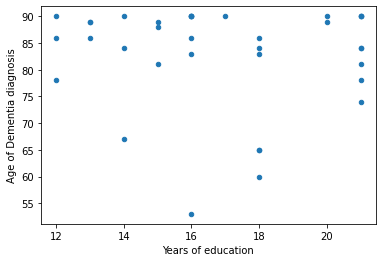

In [47]:
# Drop the rows where there is no age of dementia diagnosis 
df_temp = df_meta[df_meta["Age of Dementia diagnosis"] != 0]
df_temp.plot.scatter(x="Years of education", y="Age of Dementia diagnosis")

This exploratory plot suggests that, in this dataset, there does not appear to be a correlation with years of education and the age of dementia diagnosis. We have to take this with a grain of salt because a large amount of the data had to be dropped because there was no age of diagnosis recorded. However, this is definitely something worth exploring more because it plays into our question regarding the correlations between education and dementia diagnosis. 

***

<a id='model'></a>
## Data Analysis and Modeling

Our initial hope when beginning this project was to see if there were correlations between gender, socioeconomic status, level of education, and the onset of Alzheimer’s or other dementias. Through our EDA, we have seen that without massive amounts of data, it may be difficult to build a predictive model since each human is so variable. However, by exploring the strongest correlations and combining them, we still hope to be able to build a working model.

Here are our ideas:

- We plan to use the gender and levels of education to predict the likelihood of developing dementia.
- We want to test if there is a statistically significant correlation between age and the onset of Alzheimer’s or other forms of dementias for males and for females. 

We do want to look at addtional features beyond gender and education, even if just for exploratory purposes, to get a sense of if there are any other potential correlations to note. 

<mark> Culotta's Feedback: "I would consider adding additional features beyond gender and education, even if only for exploratory purposes." See line above that I just added, can we try to actually do that?

## Modeling Attempts: 

Ideas: 
- Dataframe with gender, cognitive status, and education

- MMSE Score - look at the converted individuals to see where their mmse started and if a change in mmse is likely to affect them to become demented.

<mark>Note to Culotta's feedback: "Re: MMSE - there is probably a complicating factor here. Folks who seem like they might have dementia are presumably more likely to receive one of these tests, no?"

In [48]:
df_alhz_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Group,cog_status_num
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,Nondemented,0.0
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,Nondemented,0.0
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,Demented,1.0
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN


In [49]:
# Connecting the datasets

# Creating a cog status num for df_long1
df_long1['cog_status_num'] = df_alhz_long['Group'].map({
    'Nondemented': 0,
    'Converted': 1,
    'Demented': 1
})

# Creating temporary DFs with just the variables we want to look at
cols = ['Subject ID', 'cog_status_num', 'M/F','Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 
                    'nWBV', 'ASF']
temp_long = df_long1[cols]
cols = ['ID', 'cog_status_num', 'M/F', 'Age', 'Educ', 'SES', 'CDR', 'eTIV', 
                    'nWBV', 'ASF']
temp_cross = df_alhz_cross[cols]
cols = ['Donor ID', 'cog_status_num', 'Sex', 'Age of onset cognitive symptoms', 'Brain pH', 'Last MMSE Score', 'Highest level of education', 'Years of education']
temp_meta = df_meta[cols]

In [50]:
# Rename the column names to be consistent
# Note: EDUC_Y = Years of education, EDUC_L = level of education
temp_long.rename(columns = {'Subject ID':'ID',
                           'M/F': 'Sex',
                           'EDUC': 'EDUC_Y'}, inplace = True)
temp_cross.rename(columns = {'M/F': 'Sex',
                           'Educ': 'EDUC_L'}, inplace = True)
temp_meta.rename(columns = {'Donor ID': 'ID',
                           'Last MMSE Score': 'MMSE',
                           'Highest level of education': 'EDUC_L',
                           'Years of education': 'EDUC_Y'}, inplace = True)

In [51]:
# Changing the columns to contain the same type
temp_meta['Sex'] = temp_meta['Sex'].map({
    'Male': 'M',
    'Female': 'F'
})

In [52]:
# now append all of them
alz_model_df = temp_long.append(temp_cross)
alz_model_df = alz_model_df.append(temp_meta)

# Adding a binary sex column
alz_model_df['Sex_binary'] = alz_model_df['Sex'].map({
    'M': 1,
    'F': 0
})

# Adding a classification column for cognitive status
alz_model_df['cog_status'] = alz_model_df['cog_status_num'].map({
    1: 'Dementia',
    0: 'No dementia'
})
alz_model_df

,ID,cog_status_num,Sex,Age,EDUC_Y,SES,MMSE,CDR,eTIV,nWBV,ASF,EDUC_L,Age of onset cognitive symptoms,Brain pH,Sex_binary,cog_status
0,OAS2_0001,0.0,M,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883,NaN,NaN,NaN,1,No dementia
2,OAS2_0002,1.0,M,75.0,12.0,NaN,23.0,0.5,1678.0,0.736,1.046,NaN,NaN,NaN,1,Dementia
5,OAS2_0004,0.0,F,88.0,18.0,3.0,28.0,0.0,1215.0,0.710,1.444,NaN,NaN,NaN,0,No dementia
7,OAS2_0005,0.0,M,80.0,12.0,4.0,28.0,0.0,1689.0,0.712,1.039,NaN,NaN,NaN,1,No dementia
10,OAS2_0007,1.0,M,71.0,16.0,NaN,28.0,0.5,1357.0,0.748,1.293,NaN,NaN,NaN,1,Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H21.33.043,1.0,F,NaN,16.0,NaN,29.0,NaN,NaN,NaN,NaN,Bachelors,90+,6.6,0,Dementia
80,H21.33.044,1.0,F,NaN,15.0,NaN,21.0,NaN,NaN,NaN,NaN,Trade School/ Tech School,87,6.6,0,Dementia
81,H21.33.045,1.0,F,NaN,12.0,NaN,17.0,NaN,NaN,NaN,NaN,High School,78,7.2,0,Dementia
82,H21.33.046,1.0,M,NaN,17.0,NaN,22.0,NaN,NaN,NaN,NaN,Professional,90+,6.4,1,Dementia


In [53]:
# downloading this dataframe to take a closer look at what is going on
#alz_model_df.to_csv('model.csv')

In [54]:
# Drop rows where the cog_status_num is unknown since that is what we are predicting.
#alz_model_df.dropna(subset=['cog_status_num'], inplace=True)
alz_model_df.dropna(subset=['cog_status'], inplace=True)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import KNNImputer

# define features
features = ["Sex_binary", "EDUC_Y", "SES", "MMSE", "eTIV", "nWBV", "ASF", "Brain pH"]

# Imputation (eventually change this to multiple-imputation but for now just imputing the nearest neighbor's val.)
nan = np.nan
X = alz_model_df[features]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)
df_X = pd.DataFrame(X, columns = features)
print(df_X)

# Define training data
#X_train_dict = dict(enumerate(X.flatten(), 1))
X_train_dict = df_X.to_dict(orient="records")
y_train = alz_model_df["cog_status_num"]

# Dummy encoding
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)
#X_new = vec.transform(X_new_dict)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Fit the 9-nearest neighbors model
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train_sc, y_train)

# define the test data (Scikit-Learn expects a matrix)
#x_new = pd.DataFrame()
#x_new["volatile acidity"] = [0.85]
#x_new["total sulfur dioxide"] = [120]
#x_new_sc = scaler.transform(x_new)

# use the model to predict on the test data
#model.predict(x_new_sc)

     Sex_binary  EDUC_Y  SES  MMSE    eTIV    nWBV     ASF  Brain pH
0           1.0    14.0  2.0  27.0  1987.0  0.6960  0.8830       6.8
1           1.0    12.0  2.0  23.0  1678.0  0.7360  1.0460       7.0
2           0.0    18.0  3.0  28.0  1215.0  0.7100  1.4440       6.6
3           1.0    12.0  4.0  28.0  1689.0  0.7120  1.0390       6.8
4           1.0    16.0  2.0  28.0  1357.0  0.7480  1.2930       6.6
..          ...     ...  ...   ...     ...     ...     ...       ...
464         0.0    16.0  1.5  29.0  1399.5  0.7255  1.2565       6.6
465         0.0    15.0  2.0  21.0  1245.5  0.7765  1.4185       6.6
466         0.0    12.0  2.0  17.0  1245.5  0.7765  1.4185       7.2
467         1.0    17.0  3.0  22.0  1687.0  0.7040  1.0415       6.4
468         1.0    21.0  3.0  26.0  1687.0  0.7040  1.0415       7.2

[469 rows x 8 columns]


KNeighborsClassifier(n_neighbors=9)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_train_pred = model.predict(X_train_sc)
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, pos_label=1)
recall = recall_score(y_train, y_train_pred, pos_label=1)
print("accuracy:", accuracy, "\nprecision:", precision, "\nrecall:", recall)

accuracy: 0.7270788912579957 
precision: 0.7110091743119266 
recall: 0.7045454545454546


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import KNNImputer

# (do not split into training and validation sets)
# define features
features = ["Sex_binary", "EDUC_Y", "SES", "MMSE", "eTIV", "nWBV", "ASF", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

# specify the pipeline
imputer = KNNImputer(n_neighbors=2, weights="uniform")
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("imputer", imputer), ("scaler", scaler), ("fit", model)])

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.22076023793182337

In [58]:
#Okay, so the error is not looking too good... going to try some model selection to see if I can reduce it

In [59]:
# Without Brain pH
features = ["Sex_binary", "EDUC_Y", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.2261432166552276

In [60]:
# Without MMSE
features = ["Sex_binary", "EDUC_Y", "SES", "eTIV", "nWBV", "ASF", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.24655136124456645

In [61]:
# Without EDUC_Y
features = ["Sex_binary", "MMSE", "SES", "eTIV", "nWBV", "ASF", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.2216236559139785

In [62]:
# Without eTIV
features = ["Sex_binary", "MMSE", "SES", "EDUC_Y", "nWBV", "ASF", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.2227638984214139

In [63]:
# Without Sex
features = ["eTIV", "MMSE", "SES", "EDUC_Y", "nWBV", "ASF", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.22140928849233585

In [64]:
# Without nWBV
features = ["eTIV", "MMSE", "SES", "EDUC_Y", "Sex_binary", "ASF", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.24080210478151454

In [65]:
# Without ASF
features = ["eTIV", "MMSE", "SES", "EDUC_Y", "Sex_binary", "nWBV", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.22680233356211393

In [66]:
features = ["eTIV", "MMSE", "nWBV", "Brain pH"]
X_dict = alz_model_df[features].to_dict(orient="records")
y = alz_model_df["cog_status_num"]

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
-np.mean(scores)

0.21334637382749938

In [77]:
# define the training data
features = ["Sex_binary", "EDUC_Y", "SES", "MMSE", "eTIV", "nWBV", "ASF", "Brain pH"]
X_train_dict = alz_model_df[features].to_dict(orient="records")
y_train = alz_model_df["cog_status"]


# convert categorical variables to dummy variables
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

# Create pipeline
pipeline = Pipeline([
    ("imputer", imputer),
    ("scaler", scaler),
    ("model", model)
])

# calculate test accuracy
cross_val_score(pipeline, X_train, y_train, 
                cv=10, scoring='accuracy')

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [68]:
# define the training data
features = ["Sex_binary", "EDUC_Y", "SES", "MMSE", "eTIV", "nWBV", "ASF", "Brain pH"]
X_train_dict = alz_model_df[features].to_dict(orient="records")
y_train = alz_model_df["cog_status"]

# convert categorical variables to dummy variables
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_train = imputer.fit_transform(X_train)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# fit the 5-nearest neighbors model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_sc, y_train)

# Calculate the model predictions on the training data.
y_train_pred = model.predict(X_train_sc)
#y_train_pred

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score


(precision_score(y_train, y_train_pred, pos_label="Dementia"),
 recall_score(y_train, y_train_pred, pos_label="Dementia"),
f1_score(y_train, y_train_pred, pos_label="Dementia"))

(0.782608695652174, 0.7363636363636363, 0.7587822014051523)

In [70]:
(precision_score(y_train, y_train_pred, pos_label="No dementia"),
 recall_score(y_train, y_train_pred, pos_label="No dementia"),
f1_score(y_train, y_train_pred, pos_label="No dementia"))

(0.7786259541984732, 0.8192771084337349, 0.7984344422700588)

In [75]:
is_demented_train = (y_train == "Dementia")
cross_val_score(pipeline, X_train, is_demented_train, 
                cv=10, scoring="f1")

array([0.74418605, 0.64      , 0.61538462, 0.72727273, 0.60465116,
       0.66666667, 0.52173913, 0.5       , 0.61538462, 0.62962963])

In [72]:
peek = ['Group', 'MMSE']
df_long1[peek]

,Group,MMSE
0,Nondemented,27.0
2,Demented,23.0
5,Nondemented,28.0
7,Nondemented,28.0
10,Demented,28.0
...,...,...
359,Demented,23.0
361,Nondemented,30.0
365,Demented,24.0
367,Demented,28.0


<a id='final'></a>
## Challenges and Final Thoughts


<mark> We can move these thoughts up at the top under the "Data Limitations" section so that they are there before the reader goes through the entire notebook. We can then make this section more dedicated to our "Insights" - the last step in the Data Lifecycle

#### Challenges with MRI Dataset: Comparisions Across Datasets
1. ***Different Columns (Variables):*** The longitudinal data and cross-sectional data contained slightly different varibles from one another. For example, 'Group' only existed in one dataframe, so we had to map the Clinical Dementia Rating for each patient found in the cross-sectional data to their correpsonding group. 
2. ***'EDUC' Ambiguity:*** In the longitudinal data, the paper that was published alongside the dataset clearly states that Education Level means the number of years in formal education for that individual. However, in the cross-sectional data, the 'Educ' numbers are suspiciously low for being total years in formal education, education may be measured differently there. We must continue to dig into what the connection between these two variables may be.

#### Challenges with Metadata Dataset:
1. ***Relatively Small Sample Size:*** One of the biggest things we have taken out of our analysis of this dataset is that we have to be cautious how much weight we put on any conclusions from this dataset. Only 84 participants are included in this data. We really liked this source because there aren't a lot of sources available publicly that have information on education and gender as they relate to dementia. However, we do recognize that this is one downfall of this dataset. We hope that in our future work we will be able to mitigate this by working with both of our datasets, and if we decide it is necessary at that point, we will figure out another dataset to draw from. 
2. ***Lack of Knowledge in the Field:*** This dataset included a lot of test scores and other information that has the potential to be useful in our analyses. We did begin looking some of them up to get a better sense of what might be useful to use in the future, but since our previous EDA focused most on gender and education, we decided to stick to the columns relating to these for the time being. 
3. ***Missing Data*** One example of a piece of missing data is that for several of the age columns, the ages above 90 are grouped together whereas all the other ages are only representative of a singular year. This made it so that those columns were not integers which complicated our task of graphing and getting summary statistics. To deal with this, we changed those "90+" categories to all just be equal to 90, which might not be a long term solution but provided us with the ability to conduct our exploratory analyses.   

***

<a id='cite'></a>
#### References

Alzheimer’s disease and healthy aging indicators: Cognitive decline | Chronic disease and health promotion data & indicators. (n.d.).https://chronicdata.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Indicators-C/jhd5-u276


Daniel S. Marcus, Anthony F. Fotenos, John G. Csernansky, John C. Morris, Randy L. Buckner; Open Access Series of Imaging Studies: Longitudinal MRI Data in Nondemented and Demented Older Adults. J Cogn Neurosci 2010; 22 (12): 2677–2684. https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal

Kavitha, C., Mani, V., Srividhya, S. R., Khalaf, O. I., & Tavera Romero, C. A. (2022). Early-stage alzheimer’s disease prediction using machine learning models. Frontiers in Public Health, 10. https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294

Marcus, D. S., Wang, T. H., Parker, J., Csernansky, J. G., Morris, J. C., & Buckner, R. L. (2007). Open access series of imaging studies (Oasis): Cross-sectional mri data in young, middle aged, nondemented, and demented older adults. Journal of Cognitive Neuroscience, 19(9), 1498–1507. https://doi.org/10.1162/jocn.2007.19.9.1498

Mri and alzheimers. (n.d.). https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers

Seattle alzheimer's disease brain cell atlas: Donor metadata. https://portal.brain-map.org/explore/seattle-alzheimers-disease/seattle-alzheimers-disease-brain-cell-atlas-download?edit&language=en


***

[Back to Top](#top)